# 3.2 Event data handling in Pyrocko

Pyrocko ships with multiple methods to load, plot, manipulate and save events. Within Pyrocko events are loaded into a list of single events.

## Contents:
* [Event loading and first inspection](#sec1)
* [Event data manipulation](#sec2)
* [Saving](#sec3)
* [Summary](#sum)


## Event loading and first inspection <a class="anchor" id="sec1"></a>

Pyrockos loading function for event data is the `load_events` function for events stored in the Pyrocko internal format. As we are dealing with QuakeML here, we need to use a different approach ([example here](https://pyrocko.org/docs/current/library/examples/metadata.html#quakeml-import)):

In [1]:
# Import of the event loading function
from pyrocko.io import quakeml

With this one imported we are now able to load the event(s) stored in a QuakeML file:

In [3]:
# Loading of a QuakeML
qml = quakeml.QuakeML.load_xml(filename='data/quakeml.xml')

The loaded `qml` is not of much use within Pyrocko. Hence we should first convert it into the Pyrocko `Event` format:

In [4]:
# Convert qml to events
events = qml.get_pyrocko_events()

Event quakeml:us.anss.org/event/7000c7y0: No preferred origin set, more than one available, using first


We can now print the event information or use the map within `Snuffler` for a first glimpse on the location (reminder, check the `Map` snuffling within `Snuffler`).

In [6]:
# Print events information
print(events)

# Load snuffler
from pyrocko.trace import snuffle

# Use Snuffler for event loading and plotting
snuffle([], events=events)


 /home/malde/.snufflings/okada/libokada.so: undefined symbol: okada_get_consts
--> run 'make' in okada snuffling directory <--


## Event data manipulation <a class="anchor" id="sec2"></a> 

Events are stored within the `event` list. Let's check for details of the first event in the list.

In [10]:
# Extract event data
event = events[0]

# Print detailed information
print(event)

--- !pf.Event
lat: 37.8973
lon: 26.7953
time: '2020-10-30 11:51:26.099999905'
depth: 10000.0
name: 'quakeml:us.anss.org/origin/7000c7y0/mww_trigger'
magnitude: 7.0
magnitude_type: 'Mww'
moment_tensor: !pf.MomentTensor
  mnn: 3.6312e+19
  mee: -3.043e+18
  mdd: -3.327e+19
  mne: 3.165e+18
  mnd: -2.1033e+19
  med: -8.93e+17
  strike1: 93.37253104994967
  dip1: 60.545290579638355
  rake1: -91.25704068107352
  strike2: 275.92758171272914
  dip2: 29.479116970859515
  rake2: -87.77538165919796
  moment: 4.087247006849476e+19
  magnitude: 7.040953922974875



Let's now check for the focal mechnanism of the earthquake, so plot it using the `beachball` plotting module of Pyrocko ([example here](https://pyrocko.org/docs/current/library/examples/plotting.html#plotting-beachballs-focal-mechanisms))

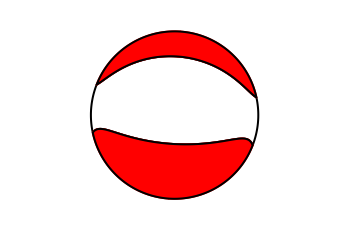

In [17]:
# Import of the plotting modules and (necessary) matplotlib
import matplotlib.pyplot as plt
from pyrocko.plot import beachball

# Generation of figure
fig, axes = plt.subplots()

# Plotting of the beachball
beachball.plot_beachball_mpl(
    mt=event.moment_tensor,
    axes=axes,
    position=(1, 1),
    size=1,
    size_units='data')

# Some plotting tweaks
axes.set_xlim(0., 2.);
axes.set_ylim(0., 2.);
axes.set_axis_off();
plt.axis('equal');

Let's now assume an error in the event data, which results in a shifted location (latitude: 20.345). So we need to update the event:

In [19]:
# Update latitude of event
event.lat = 20.345

When now generating the map of the `event` and/or the `events` list, you can see, that the location is already updated. No further changes are required. 

In [22]:
# Open snuffler with single event
snuffle([], events=[event]);

# Open snuffler with the events list
snuffle([], events=events);

cc.py:pyrocko.gui.snuffling.okada - WARNING  - 
 /home/malde/.snufflings/okada/libokada.so: undefined symbol: okada_get_consts
--> run 'make' in okada snuffling directory <--
cc.py:pyrocko.gui.snuffling.okada - WARNING  - 
 /home/malde/.snufflings/okada/libokada.so: undefined symbol: okada_get_consts
--> run 'make' in okada snuffling directory <--


## Saving <a class="anchor" id="sec3"></a>

In order to save the manipulated `events` list we can make use of Pyrockos `dump_events` method. Similar to the other submodules will we add a `processed_` to the filename. Note, that it will result in a serialized YAML file, not a QuakeML.

In [24]:
# Load writing function
from pyrocko.model import dump_events

# Dump events in Pyrockos internal format
dump_events(events, filename='processed_events_pyrocko.yaml')

## Summary <a class="anchor" id="sum"></a>

This simple module covered the
* loading of QuakeML files with **quakeml.QuakeML.load_xml**,
* event format conversion into Pyrockos own format,
* catalog plotting and inspection e.g. with **snuffler**,
* simple event data manipulation, here of the latitude,
* catalog writing into file with **dump_events**.